In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# #Data Extraction

In [18]:
import zipfile
import os
zip_path = "/content/drive/MyDrive/guvi/Faulty_solar_panel.zip"  # update path if needed
extract_path = "/content/drive/MyDrive/guvi/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped to:", extract_path)

✅ Unzipped to: /content/drive/MyDrive/guvi/data


# #Data Cleaning

In [21]:
valid_extensions = ['.jpg', '.jpeg', '.png']
non_images = []
folders=os.listdir(extract_path)

for root, dirs, files in os.walk(extract_path):
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext not in valid_extensions:
            non_images.append(os.path.join(root, file))

print("Non-image files found:")
if non_images:
    for file in non_images:
        print("  -", file)
else:
    print("No non-image files detected.")

Non-image files found:
  - /content/drive/MyDrive/guvi/data/Faulty_solar_panel/Physical-Damage/desktop.ini
  - /content/drive/MyDrive/guvi/data/Faulty_solar_panel/Snow-Covered/desktop.ini
  - /content/drive/MyDrive/guvi/data/Faulty_solar_panel/Bird-drop/desktop.ini
  - /content/drive/MyDrive/guvi/data/Faulty_solar_panel/Electrical-damage/desktop.ini
  - /content/drive/MyDrive/guvi/data/Faulty_solar_panel/Dusty/desktop.ini
  - /content/drive/MyDrive/guvi/data/Faulty_solar_panel/Clean/desktop.ini


# #Checking for corrupted files

In [26]:
from PIL import Image

corrupted_files = []
folders = os.listdir(extract_path)

for root, dirs, files in os.walk(extract_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()
        except:
            corrupted_files.append(file_path)


if corrupted_files:
    print(" Corrupted images found:")
    for file in corrupted_files:
        print("  -", file)
else:
    print(" No corrupted images found.")

 No corrupted images found.


# #Cleaning non images and duplicates

In [33]:
import os

# Combine non-image and corrupted files
files_to_delete = list(set(non_images + corrupted_files))

print(f"Attempting to delete {len(files_to_delete)} files...")

deleted_count = 0
for file_path in files_to_delete:
    try:
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"✅ Deleted: {file_path}")
            deleted_count += 1
        else:
            print(f"⚠️ Warning: File not found, skipping: {file_path}")
    except Exception as e:
        print(f"❌ Error deleting {file_path}: {e}")

print(f"Summary: Successfully deleted {deleted_count} files.")

# Clear the lists after deletion
non_images = []
corrupted_files = []

Attempting to delete 0 files...
Summary: Successfully deleted 0 files.


# #Checking the number of images in each class

In [25]:
import os
from collections import defaultdict

# Set your dataset path
data_path = "/content/drive/MyDrive/guvi/data/Faulty_solar_panel"

# Get image counts per class
class_counts = defaultdict(int)
valid_extensions = ('.jpg', '.jpeg', '.png')

for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.lower().endswith(valid_extensions):
            class_name = os.path.basename(root)
            class_counts[class_name] += 1

# Print class distribution
print("📊 Image count per class:")
for label, count in class_counts.items():
    print(f"  - {label}: {count} images")

📊 Image count per class:
  - Physical-Damage: 69 images
  - Snow-Covered: 123 images
  - Bird-drop: 191 images
  - New: 16 images
  - Electrical-damage: 103 images
  - Dusty: 190 images
  - Clean: 193 images


# #Visualisation of images

In [28]:
import os

# Check if the dataset path exists
print("Path exists:", os.path.exists(data_path))

# If path exists, list its contents
if os.path.exists(data_path):
    print("Contents:", os.listdir(data_path))

Path exists: True
Contents: ['Physical-Damage', 'Snow-Covered', 'Bird-drop', 'Electrical-damage', 'Dusty', 'Clean']


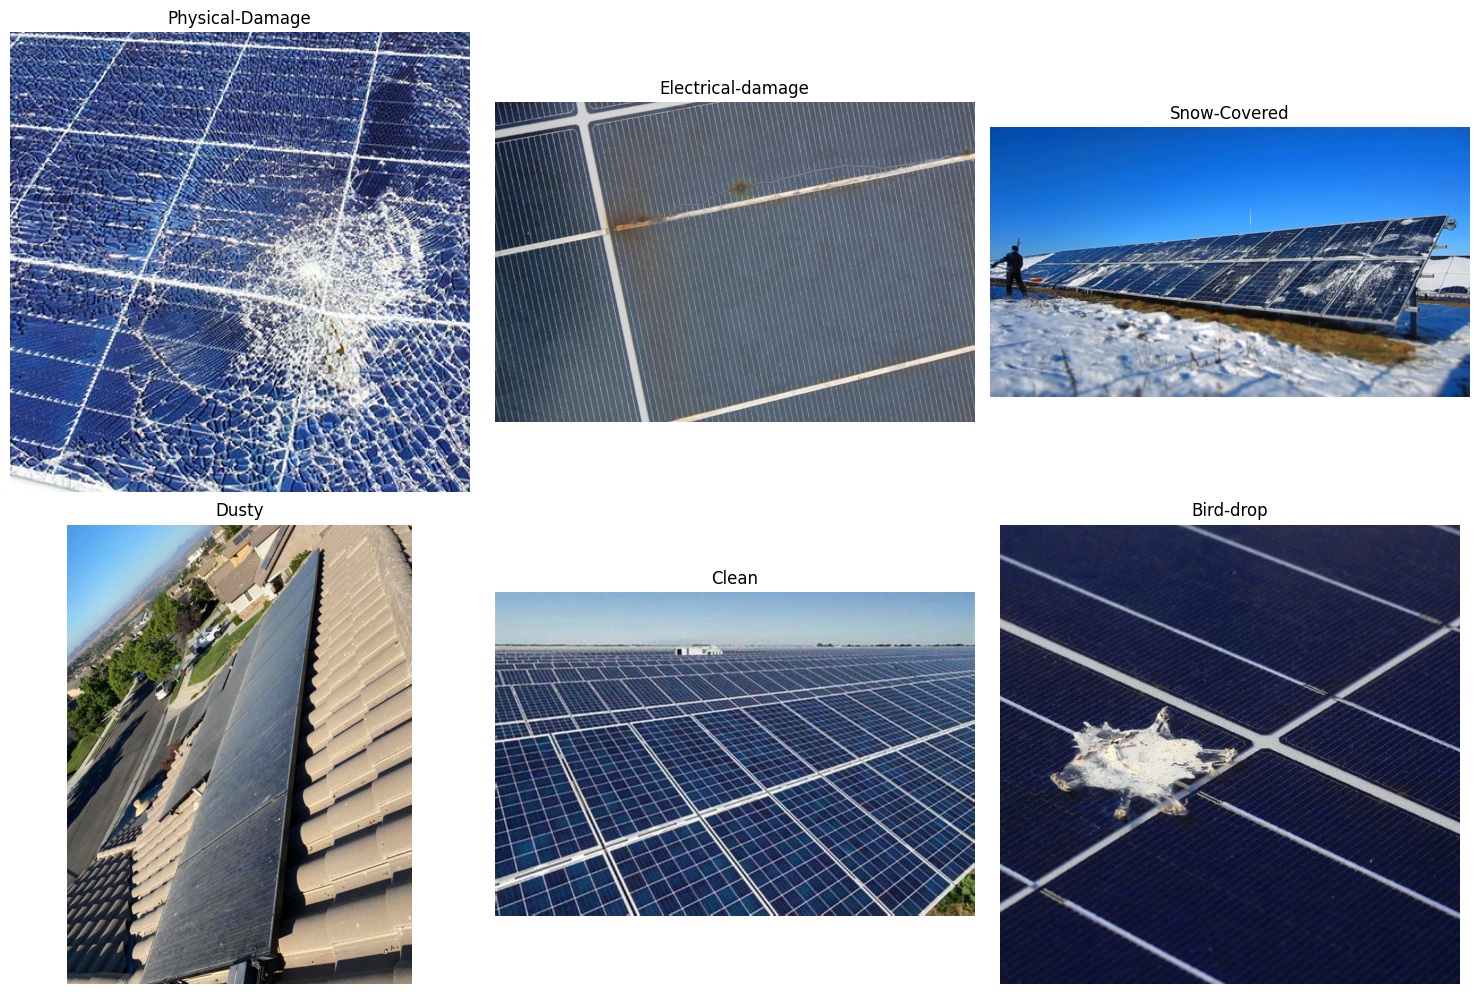

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

def view_random_images(dataset_path, class_names, num_images=6):
    plt.figure(figsize=(15, 10))

    for i, label in enumerate(class_names):
        folder_path = os.path.join(dataset_path, label)
        img_name = random.choice(os.listdir(folder_path))
        img_path = os.path.join(folder_path, img_name)

        img = mpimg.imread(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

class_names = ['Physical-Damage', 'Electrical-damage', 'Snow-Covered', 'Dusty', 'Clean', 'Bird-drop']
view_random_images(data_path, class_names)

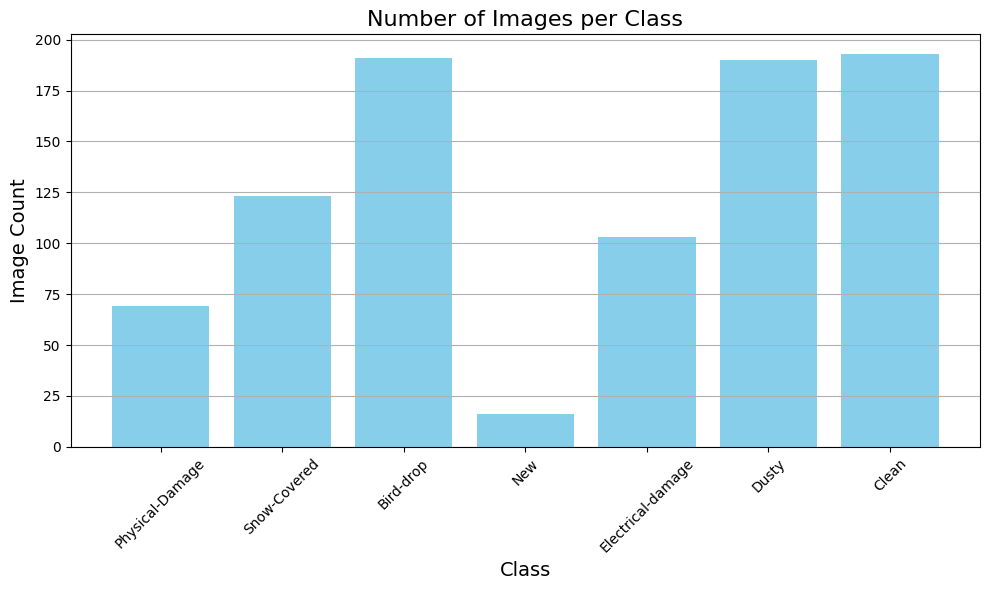

In [30]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Number of Images per Class", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Image Count", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# #Labels for each class

In [35]:
import csv

# Output CSV path
csv_path = "/content/drive/MyDrive/guvi/data/solar_panel_labels.csv"
valid_extensions = ('.jpg', '.jpeg', '.png')

# Create label CSV file
with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['image_path', 'label'])  # Header

    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.lower().endswith(valid_extensions):
                    file_path = os.path.join(folder_path, file)
                    writer.writerow([file_path, folder])  # label = folder name

print(f"✅ Labeled CSV created at: {csv_path}")

✅ Labeled CSV created at: /content/drive/MyDrive/guvi/data/solar_panel_labels.csv


In [37]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Load CSV
df = pd.read_csv("/content/drive/MyDrive/guvi/data/solar_panel_labels.csv")

# Create LabelEncoder instance
le = LabelEncoder()

# Fit and transform labels
df['encoded_label'] = le.fit_transform(df['label'])

# Preview
print(df[['label', 'encoded_label']].head())

# Save the updated CSV
df.to_csv("/content/drive/MyDrive/guvi/data/solar_panel_labels_encoded.csv", index=False)

             label  encoded_label
0  Physical-Damage              4
1  Physical-Damage              4
2  Physical-Damage              4
3  Physical-Damage              4
4  Physical-Damage              4


In [38]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("🧭 Label Mapping:", label_mapping)

🧭 Label Mapping: {'Bird-drop': np.int64(0), 'Clean': np.int64(1), 'Dusty': np.int64(2), 'Electrical-damage': np.int64(3), 'Physical-Damage': np.int64(4), 'Snow-Covered': np.int64(5)}


# #Checking file size of each images

In [39]:
from PIL import Image

data_path = '/content/drive/MyDrive/guvi/data/Faulty_solar_panel'

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)

    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                with Image.open(file_path) as img:
                    print(f"{file} - {img.size}")
            except Exception as e:
                print(f"⚠️ Skipping {file_path}: {e}")


Physical (68).jpg - (300, 159)
Physical (64).jpg - (1200, 630)
Physical (7).jpg - (780, 585)
Physical (63).jpg - (1024, 768)
Physical (9).jpg - (400, 300)
Physical (66).jpg - (720, 473)
Physical (6).jpg - (1000, 667)
Physical (69).jpg - (300, 200)
Physical (38).jpg - (474, 632)
Physical (65).jpg - (340, 327)
Physical (67).jpg - (406, 406)
Physical (62).jpg - (849, 450)
Physical (54).jpg - (700, 525)
Physical (46).jpg - (302, 227)
Physical (48).jpg - (592, 400)
Physical (42).jpg - (474, 279)
Physical (51).jpg - (800, 600)
Physical (59).jpg - (600, 600)
Physical (35).jpg - (1024, 768)
Physical (5).jpg - (500, 391)
Physical (56).jpg - (565, 319)
Physical (41).jpg - (474, 316)
Physical (39).jpg - (474, 324)
Physical (47).jpg - (1000, 720)
Physical (4).jpg - (300, 200)
Physical (44).jpg - (1600, 900)
Physical (8).jpg - (1000, 720)
Physical (61).jpg - (768, 512)
Physical (40).jpg - (600, 600)
Physical (49).jpg - (825, 547)
Physical (45).jpg - (474, 352)
Physical (57).jpg - (3024, 4032)
Physi

# #Perform image augumentation

In [40]:
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms

# Load the encoded CSV
csv_file = "/content/drive/MyDrive/guvi/data/solar_panel_labels_encoded.csv"
df = pd.read_csv(csv_file)

# ✅ Define image augmentations
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
])

# ✅ Custom dataset using CSV
class SolarPanelDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]['image_path']
        label = self.data.iloc[idx]['encoded_label']

        # Load and transform the image
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image, label

# #Balance the dataset

In [41]:
from torch.utils.data import DataLoader, WeightedRandomSampler
from collections import Counter
import numpy as np

# ✅ Create dataset instance
dataset = SolarPanelDataset(df, transform=transform)

# ✅ Calculate class distribution
label_counts = Counter(df['encoded_label'])
print("Class distribution:", label_counts)

# ✅ Compute weights
class_weights = {label: 1.0 / count for label, count in label_counts.items()}
sample_weights = [class_weights[label] for label in df['encoded_label']]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

Class distribution: Counter({1: 186, 2: 182, 0: 142, 5: 113, 3: 91, 4: 64})


In [42]:
batch_size = 32

loader = DataLoader(
    dataset,
    batch_size=batch_size,
    sampler=sampler
)

In [43]:
images, labels = next(iter(loader))
print("Image batch shape:", images.shape)
print("Labels:", labels)

Image batch shape: torch.Size([32, 3, 224, 224])
Labels: tensor([0, 5, 4, 0, 5, 1, 5, 5, 5, 0, 2, 4, 3, 1, 2, 2, 0, 4, 3, 0, 1, 5, 5, 5,
        1, 3, 2, 0, 2, 5, 2, 5])


In [44]:
from sklearn.preprocessing import LabelEncoder

# If you need to convert encoded_label back to original
le = LabelEncoder()
le.fit(df['label'])  # original string labels
print("Classes:", le.classes_)

Classes: ['Bird-drop' 'Clean' 'Dusty' 'Electrical-damage' 'Physical-Damage'
 'Snow-Covered']


In [45]:
!pip install torchvision --upgrade
!pip install scikit-learn

# # train-test split

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

csv_path = "/content/drive/MyDrive/guvi/data/solar_panel_labels_encoded.csv"
df = pd.read_csv(csv_path)

# Split 70% train, 15% val, 15% test
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['encoded_label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['encoded_label'], random_state=42)

print("Train:", len(train_df), "Val:", len(val_df), "Test:", len(test_df))

Train: 544 Val: 117 Test: 117


In [48]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2, 0.2, 0.2),
    transforms.ToTensor(),
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# #Data sets and data loaders

In [49]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from collections import Counter
import torch

class SolarPanelDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = Image.open(self.data.iloc[idx]['image_path']).convert('RGB')
        label = self.data.iloc[idx]['encoded_label']
        if self.transform:
            image = self.transform(image)
        return image, label

def get_sampler(df):
    label_counts = Counter(df['encoded_label'])
    class_weights = {cls: 1.0 / count for cls, count in label_counts.items()}
    weights = [class_weights[label] for label in df['encoded_label']]
    return WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

# Datasets
train_dataset = SolarPanelDataset(train_df, transform=train_transform)
val_dataset = SolarPanelDataset(val_df, transform=val_test_transform)
test_dataset = SolarPanelDataset(test_df, transform=val_test_transform)

# Loaders
train_loader = DataLoader(train_dataset, batch_size=32, sampler=get_sampler(train_df))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# #Train and evaluate models

In [50]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")
    return model

def evaluate_model(model, loader, name="Model"):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu()
            y_pred.extend(preds)
            y_true.extend(labels)

    print(f"📊 Evaluation Results for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# #Basic CNN model

Epoch 1/5, Loss: 1.7942
Epoch 2/5, Loss: 1.7862
Epoch 3/5, Loss: 1.7683
Epoch 4/5, Loss: 1.7120
Epoch 5/5, Loss: 1.6833
📊 Evaluation Results for BasicCNN
Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.32      0.32        22
           1       0.37      0.71      0.49        28
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         9
           5       0.29      0.71      0.41        17

    accuracy                           0.33       117
   macro avg       0.16      0.29      0.20       117
weighted avg       0.19      0.33      0.24       117



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


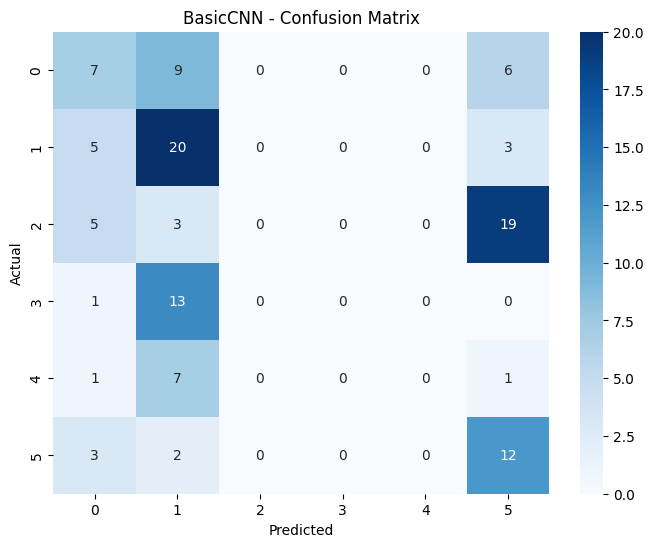

💾 Saved model to: /content/drive/MyDrive/guvi/data/models/basic_cnn.pth


In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import os

# ✅ Define Save Helper Function
def save_model(model, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    torch.save(model.state_dict(), path)
    print(f"💾 Saved model to: {path}")

# ✅ Define Basic CNN
class BasicCNN(nn.Module):
    def __init__(self, num_classes):
        super(BasicCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.AdaptiveAvgPool2d((1,1))
        )
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

# ✅ Initialize model, optimizer, criterion
basic_model = BasicCNN(num_classes=6)
optimizer = optim.Adam(basic_model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# ✅ Train and Evaluate
basic_model = train_model(basic_model, train_loader, val_loader, criterion, optimizer, epochs=5)
evaluate_model(basic_model, test_loader, name="BasicCNN")

# ✅ Save model safely
save_model(basic_model, "/content/drive/MyDrive/guvi/data/models/basic_cnn.pth")

# #Resnet model

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s]


Epoch 1/5, Loss: 1.4430
Epoch 2/5, Loss: 1.3115
Epoch 3/5, Loss: 1.1462
Epoch 4/5, Loss: 0.9406
Epoch 5/5, Loss: 0.9170
📊 Evaluation Results for ResNet18
Accuracy: 0.6923076923076923
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.68      0.57        22
           1       0.77      0.61      0.68        28
           2       0.79      0.85      0.82        27
           3       0.72      0.93      0.81        14
           4       0.50      0.44      0.47         9
           5       1.00      0.53      0.69        17

    accuracy                           0.69       117
   macro avg       0.71      0.67      0.67       117
weighted avg       0.73      0.69      0.69       117



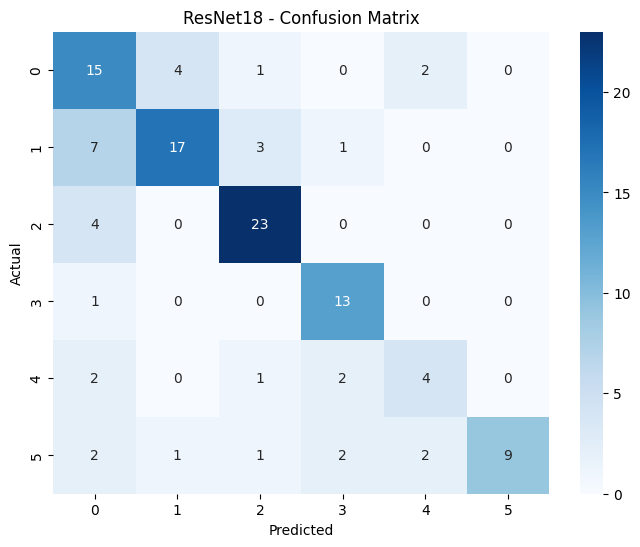

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Load pretrained ResNet18 and modify final layer
resnet_model = models.resnet18(pretrained=True)
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, 6)  # 6 classes

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model = resnet_model.to(device)

# Define optimizer and loss
optimizer = optim.Adam(resnet_model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Train model
resnet_model = train_model(resnet_model, train_loader, val_loader, criterion, optimizer, epochs=5)

# Evaluate model on test set
evaluate_model(resnet_model, test_loader, name="ResNet18")

# Save the model
torch.save(resnet_model.state_dict(), "/content/drive/MyDrive/guvi/data/models/resnet18.pth")

# #Efficient net model

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 87.9MB/s]


Epoch 1/5, Loss: 1.0617
Epoch 2/5, Loss: 0.6899
Epoch 3/5, Loss: 0.4738
Epoch 4/5, Loss: 0.5318
Epoch 5/5, Loss: 0.4823
📊 Evaluation Results for EfficientNet-B0
Accuracy: 0.7863247863247863
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.83      0.71      0.77        28
           2       0.72      0.85      0.78        27
           3       0.85      0.79      0.81        14
           4       0.71      0.56      0.62         9
           5       0.79      0.88      0.83        17

    accuracy                           0.79       117
   macro avg       0.79      0.77      0.77       117
weighted avg       0.79      0.79      0.78       117



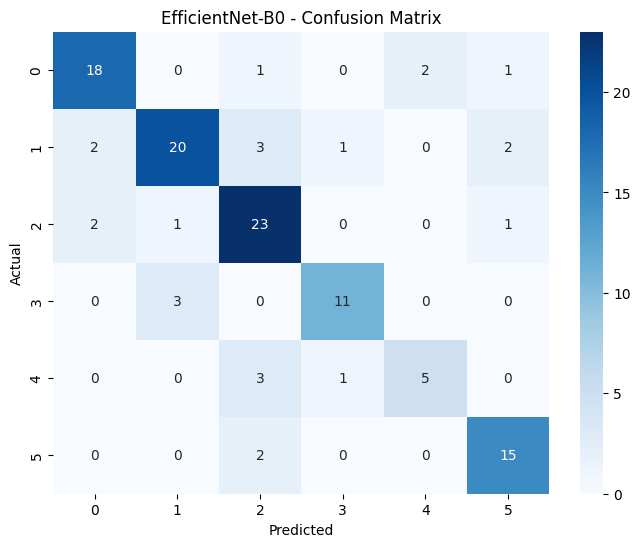

In [56]:
from torchvision.models import efficientnet_b0
import torch.nn as nn

# Load EfficientNet
efficientnet_model = efficientnet_b0(pretrained=True)
efficientnet_model.classifier[1] = nn.Linear(efficientnet_model.classifier[1].in_features, 6)
efficientnet_model = efficientnet_model.to(device)

# Optimizer and Loss
optimizer = torch.optim.Adam(efficientnet_model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Train EfficientNet
efficientnet_model = train_model(efficientnet_model, train_loader, val_loader, criterion, optimizer, epochs=5)

# Evaluate on test data
evaluate_model(efficientnet_model, test_loader, name="EfficientNet-B0")

# Save model
torch.save(efficientnet_model.state_dict(), "/content/drive/MyDrive/guvi/data/models/efficientnet_b0.pth")

# #Mobile net model

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:02<00:00, 5.53MB/s]


Epoch 1/5, Loss: 1.2593
Epoch 2/5, Loss: 1.0664
Epoch 3/5, Loss: 0.8041
Epoch 4/5, Loss: 0.7462
Epoch 5/5, Loss: 0.6279
📊 Evaluation Results for MobileNet-V2
Accuracy: 0.7264957264957265
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.64      0.96      0.77        28
           2       0.90      0.67      0.77        27
           3       1.00      0.50      0.67        14
           4       0.58      0.78      0.67         9
           5       0.68      0.76      0.72        17

    accuracy                           0.73       117
   macro avg       0.76      0.71      0.71       117
weighted avg       0.77      0.73      0.72       117



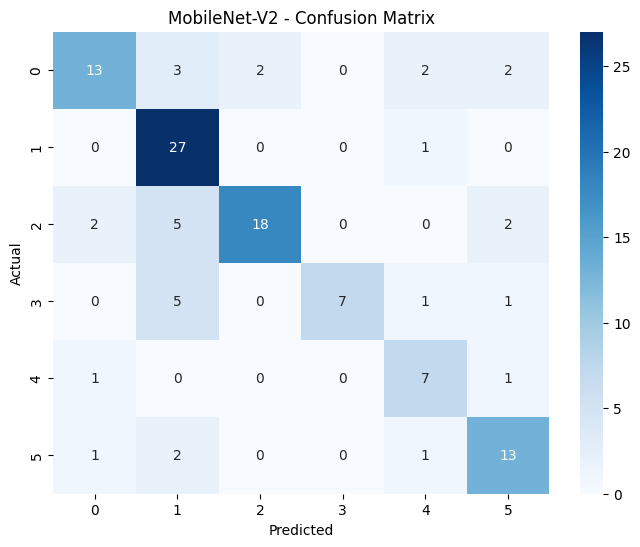

In [57]:
from torchvision.models import mobilenet_v2

# Load MobileNetV2
mobilenet_model = mobilenet_v2(pretrained=True)
mobilenet_model.classifier[1] = nn.Linear(mobilenet_model.classifier[1].in_features, 6)
mobilenet_model = mobilenet_model.to(device)

# Optimizer and Loss
optimizer = torch.optim.Adam(mobilenet_model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Train MobileNet
mobilenet_model = train_model(mobilenet_model, train_loader, val_loader, criterion, optimizer, epochs=5)

# Evaluate on test data
evaluate_model(mobilenet_model, test_loader, name="MobileNet-V2")

# Save model
torch.save(mobilenet_model.state_dict(), "/content/drive/MyDrive/guvi/data/models/mobilenet_v2.pth")

# #Reducing overfitting by

1.Data augumentation
2.Recreate dataset and dataloaders
3.Use a learning rate scheduler
4.Training loop with scheduler step()
5.Testing accuracy after regularisation

In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import efficientnet_b0
import os

# ---------- 1. Device ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------- 2. Transforms ----------
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ---------- 3. Custom Dataset (assumed already implemented) ----------
from torch.utils.data import Dataset
class SolarPanelDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]['image_path']
        label = self.data.iloc[idx]['encoded_label']

        # Load and transform the image
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image, label

# ---------- 4. Sampler for Class Balancing ----------
from torch.utils.data import WeightedRandomSampler
import numpy as np

def get_sampler(df):
    class_counts = df['encoded_label'].value_counts().to_dict()
    weights = df['encoded_label'].map(lambda x: 1.0 / class_counts[x])
    return WeightedRandomSampler(weights.values, len(weights))

# ---------- 5. Load Dataset ----------
train_dataset = SolarPanelDataset(train_df, transform=train_transform)
val_dataset = SolarPanelDataset(val_df, transform=val_test_transform)
test_dataset = SolarPanelDataset(test_df, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=get_sampler(train_df))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ---------- 6. Load Model ----------
model = efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 6)
model = model.to(device)

# ---------- 7. Loss, Optimizer, Scheduler ----------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

# ---------- 8. Training ----------
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    scheduler.step()
    acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {running_loss:.4f} - Accuracy: {acc:.2f}%")

# ---------- 9. Evaluation ----------
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"✅ Test Accuracy: {test_accuracy:.2f}%")

# ---------- 10. Save Model ----------
os.makedirs("/content/drive/MyDrive/guvi/data/models", exist_ok=True)
torch.save(model.state_dict(), "/content/drive/MyDrive/guvi/data/models/efficientnet_b0_balanced_augmented.pth")

Epoch [1/5] - Loss: 15.4153 - Accuracy: 71.14%
Epoch [2/5] - Loss: 8.7153 - Accuracy: 85.11%
Epoch [3/5] - Loss: 5.7020 - Accuracy: 88.24%
Epoch [4/5] - Loss: 4.4028 - Accuracy: 91.36%
Epoch [5/5] - Loss: 2.7244 - Accuracy: 96.51%
✅ Test Accuracy: 87.18%


#Install Streamlit

In [59]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.8 MB/s eta 0:00:00


#Streamlit using pyngrok

In [64]:
%%writefile cnn.py
import streamlit as st
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import efficientnet_b0
from PIL import Image

# Label map (update this based on your model training)
label_map = {
    0: "Bird-drop",
    1: "Clean",
    2: "Dusty",
    3: "Electrical-damage",
    4: "Physical-Damage",
    5: "Snow-Covered"
}

# Maintenance recommendations for each class
recommendations = {
    "Bird-drop": "🧹 Clean the panel surface to restore efficiency.",
    "Clean": "✅ No action needed. Panel is in good condition.",
    "Dusty": "🧹 Clean the solar panel to improve performance.",
    "Electrical-damage": "⚡ Call a certified electrician immediately.",
    "Physical-Damage": "🔧 Inspect and replace damaged parts.",
    "Snow-Covered": "❄️ Remove snow carefully to allow sunlight exposure."
}

# Image transformation - same as training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Function to load trained model
@st.cache_resource
def load_model(model_path="/content/drive/MyDrive/guvi/data/models/efficientnet_b0_balanced_augmented.pth"):
    model = efficientnet_b0(weights=None)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, 6)
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model

model = load_model()

# Streamlit UI
st.title("⚡ Solar Panel Defect Detection")
st.write("Upload a solar panel image to predict the type of defect and get a maintenance recommendation.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", width=300)  # ✅ Smaller fixed-size image

    # Preprocess
    input_tensor = transform(image).unsqueeze(0)  # shape: [1, 3, 224, 224]

    # Predict
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted = torch.max(outputs, 1)
        predicted_label = label_map[int(predicted)]

    st.success(f"✅ Predicted Class: **{predicted_label}**")

    # Show maintenance recommendation
    st.info(recommendations[predicted_label])

Overwriting cnn.py


In [65]:
!pip install pyngrok

In [66]:
from pyngrok import ngrok
import time

ngrok.kill()  # Kill existing tunnels

# Start Streamlit app in background
!streamlit run cnn.py &> /dev/null &

# Wait for it to launch
time.sleep(5)

# Create ngrok tunnel
public_url = ngrok.connect(8501)
print(f"🔗 Public URL: {public_url}")

🔗 Public URL: NgrokTunnel: "https://d26a820a1b1d.ngrok-free.app" -> "http://localhost:8501"
